In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize']=10,6
import csv
import numpy as np

In [2]:
df2=pd.read_csv('final_input_file.csv')
#df2

# Visualizing The Dataset

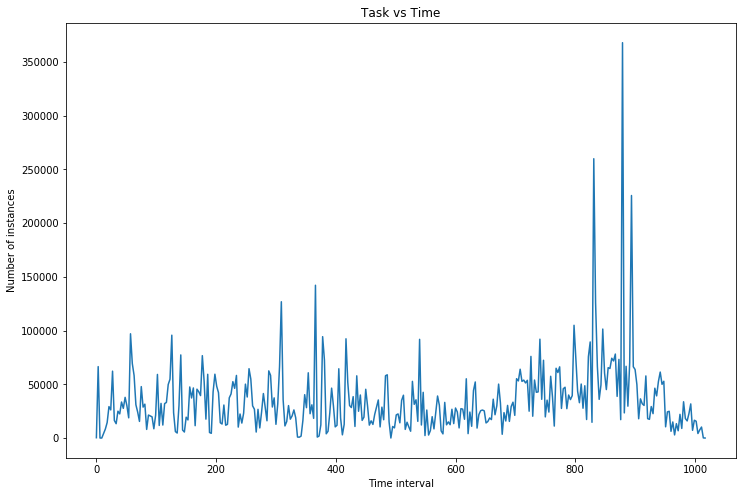

In [4]:
fig=plt.figure(figsize=(12,8))
plt.title("Task vs Time")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(df2.time_interval, df2.no_of_instances)
plt.show()

# Sliding Window_ARMA (size=20)

Time, predicted, expected 
 60 15467 69360
Time, predicted, expected 
 63 43708 58208
Time, predicted, expected 
 66 43849 30980
Time, predicted, expected 
 69 30561 24095
Time, predicted, expected 
 72 28808 15465
Time, predicted, expected 
 75 26627 47854
Time, predicted, expected 
 78 37947 28770
Time, predicted, expected 
 81 34135 31513
Time, predicted, expected 
 84 34856 8024
Time, predicted, expected 
 87 27743 21380
Time, predicted, expected 
 90 28297 20513
Time, predicted, expected 
 93 28162 19727
Time, predicted, expected 
 96 28392 8616
Time, predicted, expected 
 99 23161 21318
Time, predicted, expected 
 102 28091 59174
Time, predicted, expected 
 105 42620 11699
Time, predicted, expected 
 108 27297 32231
Time, predicted, expected 
 111 32610 12084
Time, predicted, expected 
 114 26397 32034
Time, predicted, expected 
 117 33789 33136
Time, predicted, expected 
 120 30326 49765
Time, predicted, expected 
 123 25306 54757
Time, predicted, expected 
 126 28675 95694
Time

Time, predicted, expected 
 624 26071 24162
Time, predicted, expected 
 627 20949 10927
Time, predicted, expected 
 630 24149 44160
Time, predicted, expected 
 633 10061 52160
Time, predicted, expected 
 636 17821 9281
Time, predicted, expected 
 639 27123 21783
Time, predicted, expected 
 642 23713 25457
Time, predicted, expected 
 645 22543 26051
Time, predicted, expected 
 648 23176 25283
Time, predicted, expected 
 651 24050 14035
Time, predicted, expected 
 654 27472 15388
Time, predicted, expected 
 657 26167 18667
Time, predicted, expected 
 660 25259 17179
Time, predicted, expected 
 663 24920 36142
Time, predicted, expected 
 666 20973 21670
Time, predicted, expected 
 669 25396 30017
Time, predicted, expected 
 672 23378 50175
Time, predicted, expected 
 675 20664 32833
Time, predicted, expected 
 678 25953 3486
Time, predicted, expected 
 681 22987 23640
Time, predicted, expected 
 684 25062 15839
Time, predicted, expected 
 687 24225 30368
Time, predicted, expected 
 690 26

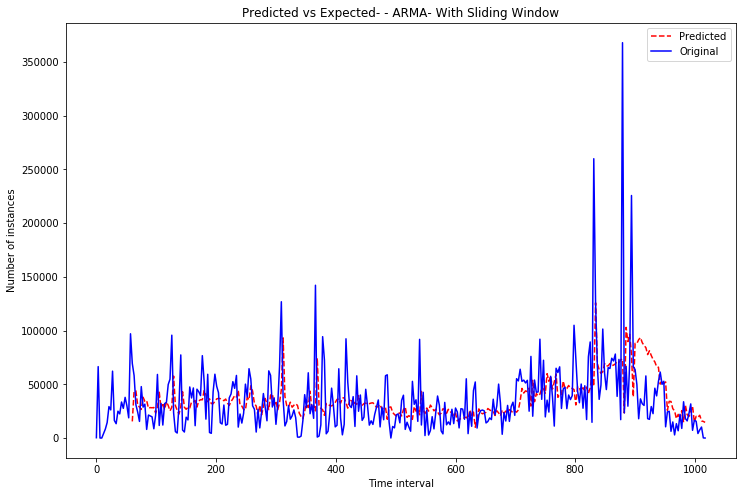

In [10]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARMA

#Computational Time
import time
time_start = time.clock()

X = df2.no_of_instances
window=20
Begin=0
predictions = list()
times=list()
SE=0
sumAPE=0
sumMASE=0

for i in range (Begin,(len(X)-window)):
    train=X[i:i+window]
    test=X[i+window] 
    #size = int(len(X) * 0.66)
    #print('Size=',size)
    #train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    #print('History \n', history)
    #print('Train \n', train)
    #print('Test \n', test)
    #for t in range(len(test)):
    #SE=0
    #sumAPE=0
    #sumMASE=0
    #for t in range (len(train),len(train)+len(test)):
    model = ARMA(history, order=(1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print('OUTPUT= \n', output)
    if (math.isnan(output[0])):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat = np.int(output[0])
    if (yhat<0):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat=yhat
    #yhat = output[0]
    predictions.append(yhat)
    obs = test
    #history.append(obs)
    #print('XYZ')
    t=i+window
    tm=df2.time_interval[t]
    times.append(tm)
    #print('time is ====', times)
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, test)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/(len(X)-window))
MAPE=(sumAPE/(len(X)-window))*100
#MASE=(sumMASE/(len(X)-window))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#print('Time= \n', times)
#print('Prediction= \n', predictions)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- - ARMA- With Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted', linestyle='dashed')
plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()


# Sliding Window_ARMA (size=10)

Time, predicted, expected 
 30 14737 16371
Time, predicted, expected 
 33 22595 13337
Time, predicted, expected 
 36 15272 24957
Time, predicted, expected 
 39 20871 22465
Time, predicted, expected 
 42 22037 33509
Time, predicted, expected 
 45 24859 27614
Time, predicted, expected 
 48 27130 37844
Time, predicted, expected 
 51 27908 29999
Time, predicted, expected 
 54 29409 18792
Time, predicted, expected 
 57 30791 97007
Time, predicted, expected 
 60 6462 69360
Time, predicted, expected 
 63 47232 58208
Time, predicted, expected 
 66 46686 30980
Time, predicted, expected 
 69 39497 24095
Time, predicted, expected 
 72 38148 15465
Time, predicted, expected 
 75 32811 47854
Time, predicted, expected 
 78 43926 28770
Time, predicted, expected 
 81 39007 31513
Time, predicted, expected 
 84 39588 8024
Time, predicted, expected 
 87 16329 21380
Time, predicted, expected 
 90 28738 20513
Time, predicted, expected 
 93 28599 19727
Time, predicted, expected 
 96 25350 8616
Time, predicte

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 294 38397 28864
Time, predicted, expected 
 297 29343 37374
Time, predicted, expected 
 300 33949 12757
Time, predicted, expected 
 303 29492 31646
Time, predicted, expected 
 306 34189 66641
Time, predicted, expected 
 309 37929 126806
Time, predicted, expected 
 312 91745 35567
Time, predicted, expected 
 315 46283 11270
Time, predicted, expected 
 318 40505 15361
Time, predicted, expected 
 321 35637 30186
Time, predicted, expected 
 324 36667 17548
Time, predicted, expected 
 327 32040 20571
Time, predicted, expected 
 330 30597 26154
Time, predicted, expected 
 333 34388 18873
Time, predicted, expected 
 336 30664 918
Time, predicted, expected 
 339 16777 773
Time, predicted, expected 
 342 13604 1789
Time, predicted, expected 
 345 6701 16304
Time, predicted, expected 
 348 15570 40339
Time, predicted, expected 
 351 31779 28245
Time, predicted, expected 
 354 23325 60707
Time, predicted, expected 
 357 48051 22611
Time, predicted, expected 
 360 22246

C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 834 125832 125832
Time, predicted, expected 
 837 76594 66533
Time, predicted, expected 
 840 77412 35993
Time, predicted, expected 
 843 76640 49375
Time, predicted, expected 
 846 78633 101400
Time, predicted, expected 
 849 82533 60457
Time, predicted, expected 
 852 91225 45092
Time, predicted, expected 
 855 87925 65475
Time, predicted, expected 
 858 84028 64705
Time, predicted, expected 
 861 78506 74241
Time, predicted, expected 
 864 68744 71728
Time, predicted, expected 
 867 62854 78135
Time, predicted, expected 
 870 64443 38759
Time, predicted, expected 
 873 76864 73167
Time, predicted, expected 
 876 64578 17094
Time, predicted, expected 
 879 79220 367838
Time, predicted, expected 
 882 23384 23384


C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\priya\Anaconda3\envs\PythonForCloudComputing\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Time, predicted, expected 
 885 115070 66751
Time, predicted, expected 
 888 98506 29636
Time, predicted, expected 
 891 101682 70221
Time, predicted, expected 
 894 87819 225655
Time, predicted, expected 
 897 56288 66359
Time, predicted, expected 
 900 111797 63774
Time, predicted, expected 
 903 112777 49842
Time, predicted, expected 
 906 121614 17935
Time, predicted, expected 
 909 120212 36447
Time, predicted, expected 
 912 61965 31877
Time, predicted, expected 
 915 61990 30346
Time, predicted, expected 
 918 56660 57782
Time, predicted, expected 
 921 63874 18041
Time, predicted, expected 
 924 42316 17381
Time, predicted, expected 
 927 32501 29285
Time, predicted, expected 
 930 35104 22680
Time, predicted, expected 
 933 33543 46370
Time, predicted, expected 
 936 26685 39218
Time, predicted, expected 
 939 32164 52644
Time, predicted, expected 
 942 34140 61374
Time, predicted, expected 
 945 42706 49980
Time, predicted, expected 
 948 44619 52809
Time, predicted, expected

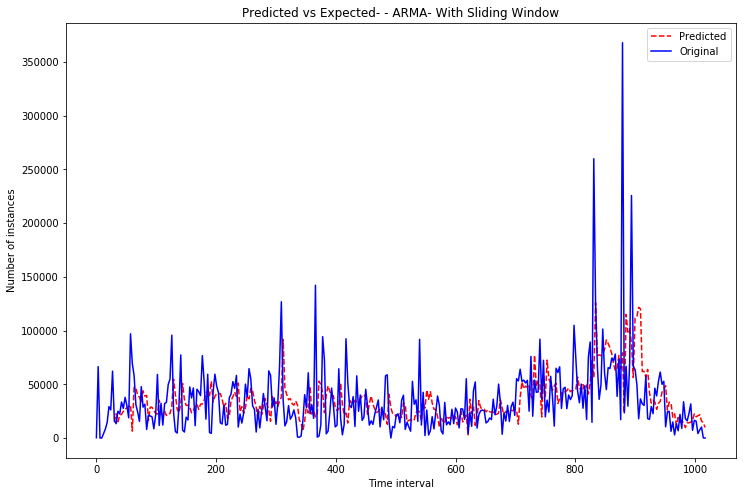

In [6]:
#Referrence: "https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/"
from pandas import read_csv
import numpy
import math
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARMA

#Computational Time
import time
time_start = time.clock()
 
X = df2.no_of_instances
window=10
Begin=0
predictions = list()
times=list()
SE=0
sumAPE=0
sumMASE=0

for i in range (Begin,(len(X)-window)):
    train=X[i:i+window]
    test=X[i+window] 
    #size = int(len(X) * 0.66)
    #print('Size=',size)
    #train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    #print('History \n', history)
    #print('Train \n', train)
    #print('Test \n', test)
    #for t in range(len(test)):
    #SE=0
    #sumAPE=0
    #sumMASE=0
    #for t in range (len(train),len(train)+len(test)):
    model = ARMA(history, order=(1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    #print('OUTPUT= \n', output)
    if (math.isnan(output[0])):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat = np.int(output[0])
    if (yhat<0):
        yhat=df2.no_of_instances[i+window]
    else:
        yhat=yhat
    #yhat = output[0]
    predictions.append(yhat)
    obs = test
    #history.append(obs)
    #print('XYZ')
    t=i+window
    tm=df2.time_interval[t]
    times.append(tm)
    #print('time is ====', times)
    print('Time, predicted, expected \n',df2.time_interval[t], yhat, test)
    #Evaluation
    e=abs(yhat-obs)
    SE=SE+e*e
    APE=abs((yhat-obs)/obs)
    sumAPE=sumAPE+APE
    #ASE=abs((yhat-obs)/(test-df2.no_of_instances[t-1]))
    #sumMASE=sumMASE+ASE
RMSE=math.sqrt(SE/(len(X)-window))
MAPE=(sumAPE/(len(X)-window))*100
#MASE=(sumMASE/(len(X)-window))
print('RMSE Value= ', RMSE)
print('MAPE Value= ', MAPE)
#print('MASE Value= ', MASE)

#print('Time= \n', times)
#print('Prediction= \n', predictions)

#Computational Time
time_elapsed = (time.clock() - time_start)
print('Computational Time=', time_elapsed)

# plot
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected- - ARMA- With Sliding Window")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(times, predictions, color='red', label='Predicted', linestyle='dashed')
plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original', linestyle='solid')
plt.legend()
plt.show()
